# Homework 2: Two-layer neural network
### Due Tuesday, January 29, 2019, 5pm
#### Jesse Zhu
#### ML-W2019

Using the MNIST hand-written digits dataset, we aim to categorize the digits 0-9 with a two-layer neural network,
composed of one hidden layer and one output layer. Both layers will use the sigmoid activation function, and the
network is fully connected.

Sigmoid function: 1/ (1+ e^-z)

In [1]:
#import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#IMPORT DATA#################
testfile = "mnist_test.csv"
trainfile = "mnist_train.csv"

#Data is 785 columns by N rows. First column = Label (0-9), others = 0:255
test_data = np.genfromtxt(testfile, skip_header=True, delimiter=',')
train_data = np.genfromtxt(trainfile, skip_header=True, delimiter=',')

#PREPROCESSING###############

#SCALE to 0:1
test_data[:,1:] /= 255
train_data[:,1:] /= 255

In [71]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

#Accuraccy function
def acc(w1, w2, data, debug = 0):
    """
    input: 
        w1: input to hidden weights [785 by hu]
        w2: hidden to output weights [(hu+1) by 10]
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
    output: Percentage of correct classifications, where a classification is taken using the highest perceptron
        output value
    """
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1) #Append 1s for bias & strip label from data[]
    h_act = np.array(list(map(sigmoid, xi @ w1[:, :]))) #N by (hidden_units)
    hi = np.append(np.ones([length,1]), h_act[:,:],1) #N by (hidden_units+1)

    o_act = np.array(list(map(sigmoid, hi @ w2[:, :]))) #N by 10

    amax = o_act.argmax(axis=1) #Predicted value
    if debug:
        print(o_act.shape)
        print(amax[0:25])
    ret = np.sum(amax == data[:,0])
    return ret/length

#Confusion matrix
def cm(w1,w2, data):
    """
    input: 
        w1: input to hidden weights [785 by hu]
        w2: hidden to output weights [(hu+1) by 10]
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
    output: confusion matrix 11x11 including labels (actual vs predicted)
    """
    length = len(data[:,0])
    xi = np.append(np.ones([length,1]), data[:, 1:],1) #Append 1s for bias & strip label from data[]
    h_act = np.array(list(map(sigmoid, xi @ w1[:, :]))) #N by (hidden_units)
    hi = np.append(np.ones([length,1]), h_act[:,:],1) #N by (hidden_units+1)
#sigmoid
    o_act = np.array(list(map(sigmoid, hi @ w2[:, :]))) #N by 10
    #o_act= hi @ w2[:, :]
    #print(o_act[0:3,:])
    
    m = np.zeros([11,11])
    m[0,1:] = np.arange(10)
    m[1:,0] = np.arange(10)
    
    for i in range(0, length):
        actual = int(data[i, 0])
        predic = int((o_act[i,:]).argmax(axis=0))
        m[actual+1, predic+1] += 1
        
    return m.astype(int)

#Training through back-propagation
def train(w1, w2, data, lr, m, debug = 0):
    """
    input: 
        w1: input to hidden weights [785 by hu]
        w2: hidden to output weights [(hu+1) by 10]
        data: matrix of N data points by 785 values, where the first value is the target (0-9), and the rest are
            scaled gray-scale values between 0 and 1
        lr: learning rate, (0:1)
        m: momentum, (0:1)
    output: Altered input weight matricies
    """
    length = len(data[:,0])
    oh_deltas_prev = np.zeros(w2.shape) #initialize previous weights to 0 (momentum calculations)
    hi_deltas_prev = np.zeros(w1.shape)

    for i in range(0,length):
        xi = np.append([1], data[i, 1:]) #add "1" to input beginning for offset -> 1x785
        hidden = np.array(list(map(sigmoid, xi @ w1[:, :]))) #1 by (hidden_units)
        hi = np.append([1], hidden) #1 by (hidden_units+1)
        out = np.array(list(map(sigmoid, hi @ w2[:, :]))) #1 by 10
        
        target = np.full((10),0.1)
        tindex = int(data[i,0])
        target[tindex] = 0.9 #1x10 of 0s, with target = 0.9, else 0.1
        #Error
        err_o = out * (1-out) *(target-out) #1 by 10 array, output error
        err_h = hidden * (1-hidden) * (w2[1:,:]@err_o) #hu by 1 array, hidden error
        
        #Backpropagation Deltas
        oh_deltas = lr * np.outer(hi, err_o) +m*oh_deltas_prev #(hu+1) by 10
        hi_deltas = lr * np.outer(xi, err_h) +m*hi_deltas_prev #785 by hu
        oh_deltas_prev = oh_deltas
        hi_deltas_prev = hi_deltas
        #Update weights
        w2 += oh_deltas
        w1 += hi_deltas
    return

***# Hidden =  10 ***************
0 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  926    0    1    8    3   13   13    4    2   10]
 [   1    0 1101    2    7    0    1    4    2   15    3]
 [   2   22    5  898   33   11    0   20   10   22   11]
 [   3    5    0   27  901    3    8    6    6    8   46]
 [   4    3    1    1    1  796    0   10    0   11  159]
 [   5   11    2    7  120   21  604   23    3   48   53]
 [   6   32    3    3    0   11    7  866    0    9   27]
 [   7    1    9   37   13    8    0    1  836    4  118]
 [   8    5    5    9   87   14    6    9    4  764   71]
 [   9    4    3    0   22   28    0    2    2    4  944]]
final test acc =  0.8636863686368637
final train acc =  0.8642644044067401


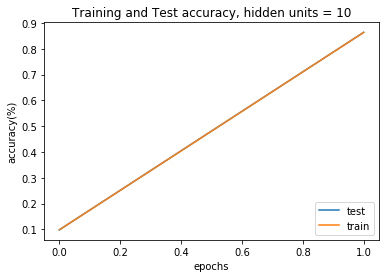

***# Hidden =  20 ***************
0 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  955    0    2    2    1    3   13    2    2    0]
 [   1    0 1106    4    5    0    0    6    2   12    0]
 [   2    7    3  897   44   13    1   23   11   22   11]
 [   3    2    0   15  941    0   16    6    6   12   12]
 [   4    1    1    2    0  889    0   27    2    3   57]
 [   5    7    1    6   59    2  747   26    8   20   16]
 [   6    4    3    5    0    1    7  934    1    3    0]
 [   7    2    8   25   18    4    1    2  905    3   59]
 [   8    7    7    4   33    8    9   28    4  851   23]
 [   9    7    6    0   13   17    5    2    6   11  942]]
final test acc =  0.9167916791679168
final train acc =  0.9148652477541293


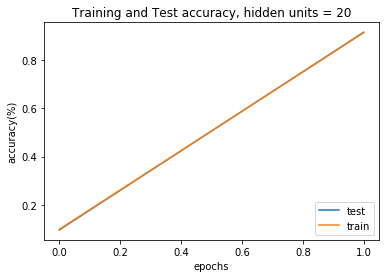

***# Hidden =  100 ***************
0 
[[   0    0    1    2    3    4    5    6    7    8    9]
 [   0  962    0    0    1    1    1    5    2    8    0]
 [   1    0 1126    1    2    0    1    2    0    3    0]
 [   2    4    3  947   16    3    0    8    9   36    6]
 [   3    1    0    5  972    0    4    0    5   15    8]
 [   4    1    1    2    0  900    0    9    0    4   65]
 [   5    4    3    0   23    3  811   11    4   19   14]
 [   6    3    3    0    1    2    2  933    0   14    0]
 [   7    3   15    8    4    1    0    2  924    9   61]
 [   8    4    3    0    4    6    1    3    3  943    7]
 [   9    3    8    0    8    8    1    1    1   13  966]]
final test acc =  0.9484948494849484
final train acc =  0.9500658344305738


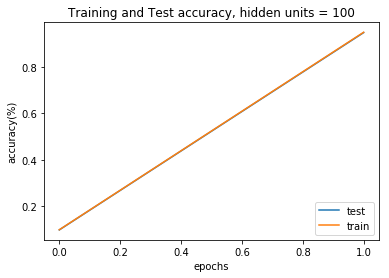

In [73]:
epochs = 1
learning_rate = 0.1
momentum = 0.9
hidden_units = [10, 20, 100]


for hu in hidden_units:
    print("***# Hidden = ",hu,"***************")
    w_hi = (np.random.rand(785,hu) * 0.10) - 0.05 #weights, input to hidden
    w_oh = (np.random.rand(hu+1,10) * 0.10) - 0.05 #weights, hidden to output
    acc_test = []
    acc_train = []

    acc_test.append(acc(w_hi, w_oh,test_data)) #initial accuracy values
    acc_train.append(acc(w_hi, w_oh,train_data))
    
    for i in range(0,epochs):
        train(w_hi, w_oh, train_data, learning_rate, momentum)
        acc_test.append(acc(w_hi, w_oh,test_data))
        acc_train.append(acc(w_hi, w_oh,train_data))
        print(i, end='', flush=True)
    print(" ") #newline
    
    print(cm(w_hi, w_oh, test_data))
    print("final test acc = ", acc_test[len(acc_test)-1])
    print("final train acc = ", acc_train[len(acc_train)-1])

    plt.plot(acc_test)
    plt.plot(acc_train)
    plt.xlabel("epochs")
    plt.ylabel("accuracy(%)")
    title = "Training and Test accuracy, hidden units = " + str(hu)
    plt.title(title)
    plt.legend(("test", "train"),loc='lower right')
    plt.show()

In [78]:
test1 = np.zeros(5)
test2 = np.append(1, test1)
print(list(map(sigmoid,[0.1, 0.2, 0.3, 0.4, 0.8, 0.9])))
t3 = np.full((10),0.1)
print(1-t3)
t1 = np.array([1,2, 3])
t2 = np.array([2,5, 10])
print("multiply")
print(t1*t2)
print(np.multiply(t1,t2))
print(np.multiply(t1,5))

t4 = np.array([[2,3,4],[1,1,1]])
t5= np.ones([3])
print(t4)
print(t5)
print(t4@t5)
print(np.zeros(t4.shape))

[0.52497918747894, 0.549833997312478, 0.574442516811659, 0.598687660112452, 0.6899744811276125, 0.7109495026250039]
[0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9]
multiply
[ 2 10 30]
[ 2 10 30]
[ 5 10 15]
[[2 3 4]
 [1 1 1]]
[1. 1. 1.]
[9. 3.]
[[0. 0. 0.]
 [0. 0. 0.]]
